In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data
import yfinance as yf

In [24]:
start='2015-01-01'
end = '2019-12-31'
df = yf.download('AAPL', start)
df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-02,27.847500,27.860001,26.837500,27.332500,24.466454,212818400
2015-01-05,27.072500,27.162500,26.352501,26.562500,23.777189,257142000
2015-01-06,26.635000,26.857500,26.157499,26.565001,23.779430,263188400
2015-01-07,26.799999,27.049999,26.674999,26.937500,24.112865,160423600
2015-01-08,27.307501,28.037500,27.174999,27.972500,25.039335,237458000
...,...,...,...,...,...,...
2023-12-14,198.020004,199.619995,196.160004,198.110001,198.110001,66831600
2023-12-15,197.529999,198.399994,197.000000,197.570007,197.570007,128256700
2023-12-18,196.089996,196.630005,194.389999,195.889999,195.889999,55751900


In [25]:
df = df.reset_index()

In [26]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-01-02,27.847500,27.860001,26.837500,27.332500,24.466454,212818400
1,2015-01-05,27.072500,27.162500,26.352501,26.562500,23.777189,257142000
2,2015-01-06,26.635000,26.857500,26.157499,26.565001,23.779430,263188400
3,2015-01-07,26.799999,27.049999,26.674999,26.937500,24.112865,160423600
4,2015-01-08,27.307501,28.037500,27.174999,27.972500,25.039335,237458000
...,...,...,...,...,...,...,...
2253,2023-12-14,198.020004,199.619995,196.160004,198.110001,198.110001,66831600
2254,2023-12-15,197.529999,198.399994,197.000000,197.570007,197.570007,128256700
2255,2023-12-18,196.089996,196.630005,194.389999,195.889999,195.889999,55751900
2256,2023-12-19,196.160004,196.949997,195.889999,196.940002,196.940002,40660000


In [27]:
df = df.drop(['Date', 'Adj Close'], axis=1)
df

,Open,High,Low,Close,Volume
0,27.847500,27.860001,26.837500,27.332500,212818400
1,27.072500,27.162500,26.352501,26.562500,257142000
2,26.635000,26.857500,26.157499,26.565001,263188400
3,26.799999,27.049999,26.674999,26.937500,160423600
4,27.307501,28.037500,27.174999,27.972500,237458000
...,...,...,...,...,...
2253,198.020004,199.619995,196.160004,198.110001,66831600
2254,197.529999,198.399994,197.000000,197.570007,128256700
2255,196.089996,196.630005,194.389999,195.889999,55751900
2256,196.160004,196.949997,195.889999,196.940002,40660000


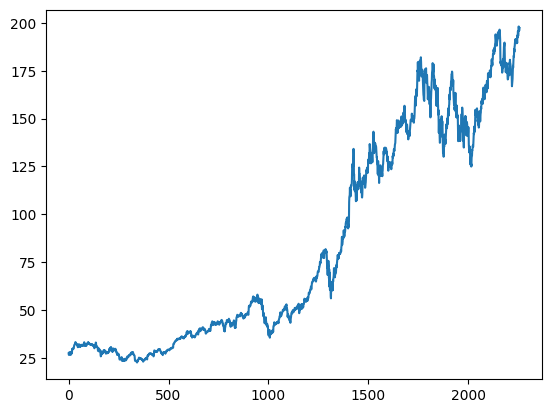

In [28]:
plt.plot(df.Close)

In [29]:
ma100 = df.Close.rolling(100).mean()

In [30]:
ma100

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
2253    181.715101
2254    181.745801
2255    181.772501
2256    181.783601
2257    181.792548
Name: Close, Length: 2258, dtype: float64

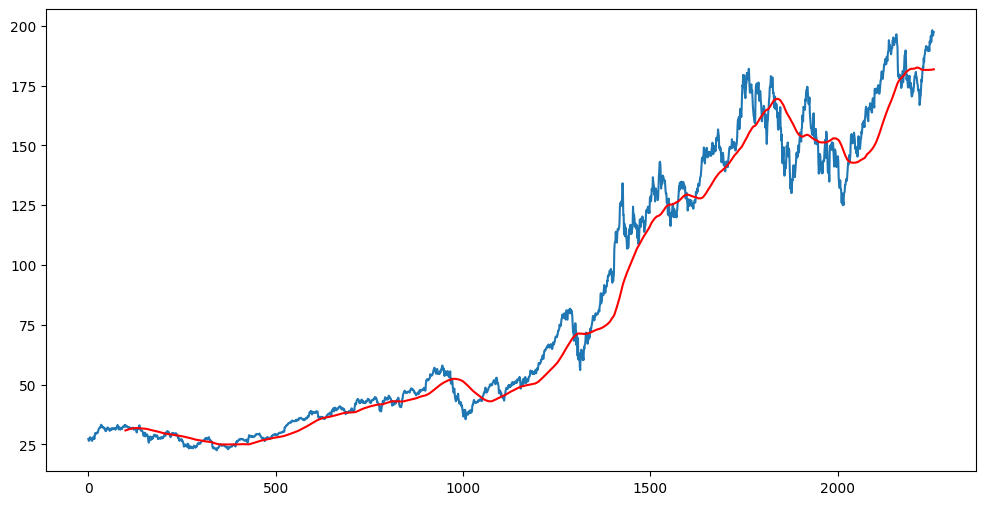

In [31]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')

In [32]:
ma200 = df.Close.rolling(200).mean()

In [33]:
ma200

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
2253    177.310700
2254    177.569000
2255    177.793300
2256    178.008850
2257    178.237574
Name: Close, Length: 2258, dtype: float64

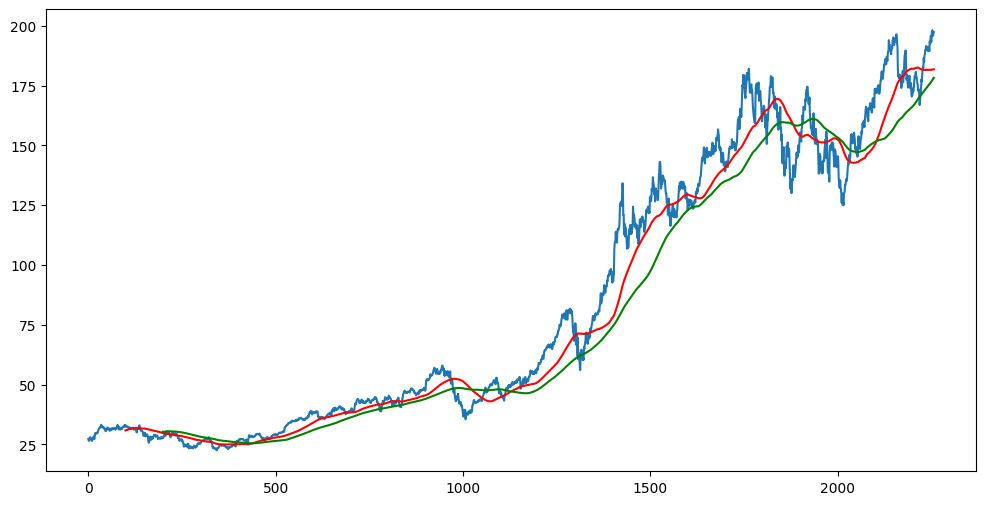

In [34]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')

In [35]:
df.shape

(2258, 5)

In [44]:
data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.4)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.4):int(len(df))])

In [45]:
print(data_training.shape)
print(data_testing.shape)

(903, 1)
(1355, 1)


In [46]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [47]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.1622384 ],
       [0.13592485],
       [0.1360103 ],
       [0.14873988],
       [0.18410938],
       [0.1851346 ],
       [0.16155492],
       [0.16984199],
       [0.16625379],
       [0.14079456],
       [0.13370356],
       [0.15702695],
       [0.16411795],
       [0.18846651],
       [0.19342167],
       [0.19444683],
       [0.16061514],
       [0.21332764],
       [0.24399833],
       [0.22913291],
       [0.24169159],
       [0.24186249],
       [0.24963691],
       [0.25288343],
       [0.24425462],
       [0.25100388],
       [0.27065356],
       [0.29508757],
       [0.30858609],
       [0.31388299],
       [0.32029051],
       [0.3278941 ],
       [0.32558735],
       [0.3345579 ],
       [0.36445965],
       [0.35736865],
       [0.32849206],
       [0.34241778],
       [0.32567287],
       [0.3310551 ],
       [0.33336184],
       [0.32635622],
       [0.30815896],
       [0.30978215],
       [0.31439558],
       [0.29192657],
       [0.27253311],
       [0.291

In [49]:
x_train=[]
y_train=[]

for i in range(100, data_training_array.shape[0]):
  x_train.append(data_training_array[i-100: i])
  y_train.append(data_training_array[i, 0])


In [50]:
x_train

[array([[0.1622384 ],
        [0.13592485],
        [0.1360103 ],
        [0.14873988],
        [0.18410938],
        [0.1851346 ],
        [0.16155492],
        [0.16984199],
        [0.16625379],
        [0.14079456],
        [0.13370356],
        [0.15702695],
        [0.16411795],
        [0.18846651],
        [0.19342167],
        [0.19444683],
        [0.16061514],
        [0.21332764],
        [0.24399833],
        [0.22913291],
        [0.24169159],
        [0.24186249],
        [0.24963691],
        [0.25288343],
        [0.24425462],
        [0.25100388],
        [0.27065356],
        [0.29508757],
        [0.30858609],
        [0.31388299],
        [0.32029051],
        [0.3278941 ],
        [0.32558735],
        [0.3345579 ],
        [0.36445965],
        [0.35736865],
        [0.32849206],
        [0.34241778],
        [0.32567287],
        [0.3310551 ],
        [0.33336184],
        [0.32635622],
        [0.30815896],
        [0.30978215],
        [0.31439558],
        [0

In [51]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [52]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [55]:
model = Sequential()


model.add(LSTM (units = 50, activation='relu', return_sequences = True, input_shape= (x_train.shape [1], 1)))
model.add (Dropout(0.2))


model.add(LSTM (units = 60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))


model.add(LSTM (units = 80, activation='relu', return_sequences = True))
model.add(Dropout(0.4))


model.add (LSTM (units = 120, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))

In [56]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_8 (LSTM)               (None, 100, 50)           10400     
                                                                 
 dropout_8 (Dropout)         (None, 100, 50)           0         
                                                                 
 lstm_9 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_9 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_10 (LSTM)              (None, 100, 80)           45120     
                                                                 
 dropout_10 (Dropout)        (None, 100, 80)           0         
                                                                 
 lstm_11 (LSTM)              (None, 120)              

In [57]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs=50)

Epoch 1/50
26/26 [==============================] - 16s 291ms/step - loss: 0.0897
Epoch 2/50
26/26 [==============================] - 8s 284ms/step - loss: 0.0163
Epoch 3/50
26/26 [==============================] - 8s 327ms/step - loss: 0.0095
Epoch 4/50
26/26 [==============================] - 7s 262ms/step - loss: 0.0089
Epoch 5/50
26/26 [==============================] - 9s 330ms/step - loss: 0.0095
Epoch 6/50
26/26 [==============================] - 7s 261ms/step - loss: 0.0094
Epoch 7/50
26/26 [==============================] - 8s 328ms/step - loss: 0.0081
Epoch 8/50
26/26 [==============================] - 7s 261ms/step - loss: 0.0070
Epoch 9/50
26/26 [==============================] - 8s 318ms/step - loss: 0.0075
Epoch 10/50
26/26 [==============================] - 8s 297ms/step - loss: 0.0067
Epoch 11/50
26/26 [==============================] - 7s 277ms/step - loss: 0.0073
Epoch 12/50
26/26 [==============================] - 10s 396ms/step - loss: 0.0063
Epoch 13/50
26/26 [====

In [58]:
model.save('keras_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [59]:
past_100_days = data_training.tail(100)

In [62]:
final_df = past_100_days.append(data_testing, ignore_index=True)

<ipython-input-62-27e824f269e9>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = past_100_days.append(data_testing, ignore_index=True)


In [63]:
final_df.head()

,Close
0,44.992500
1,44.610001
2,44.662498
3,44.505001
4,43.825001


In [65]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.05810073],
       [0.05574779],
       [0.05607073],
       ...,
       [0.98634371],
       [0.99280278],
       [0.99529224]])

In [66]:
input_data.shape

(1455, 1)

In [67]:
x_test = []
y_test = []
for i in range(100, input_data.shape[0]):
  x_test.append(input_data[i-100:i])
  y_test.append(input_data[i, 0])

In [68]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(1355, 100, 1)
(1355,)


In [69]:
y_predicted = model.predict(x_test)
y_predicted.shape

43/43 [==============================] - 6s 124ms/step


(1355, 1)

In [70]:
y_test

array([0.10119185, 0.10285276, 0.09983852, ..., 0.98634371, 0.99280278,
       0.99529224])

In [71]:
y_predicted

array([[0.10453293],
       [0.1050141 ],
       [0.10621706],
       ...,
       [0.9278254 ],
       [0.9305779 ],
       [0.9332217 ]], dtype=float32)

In [72]:
scaler.scale_

array([0.00615148])

In [73]:
scale_factor = 1/0.00615148

In [74]:
y_predicted *= scale_factor
y_test *= scale_factor

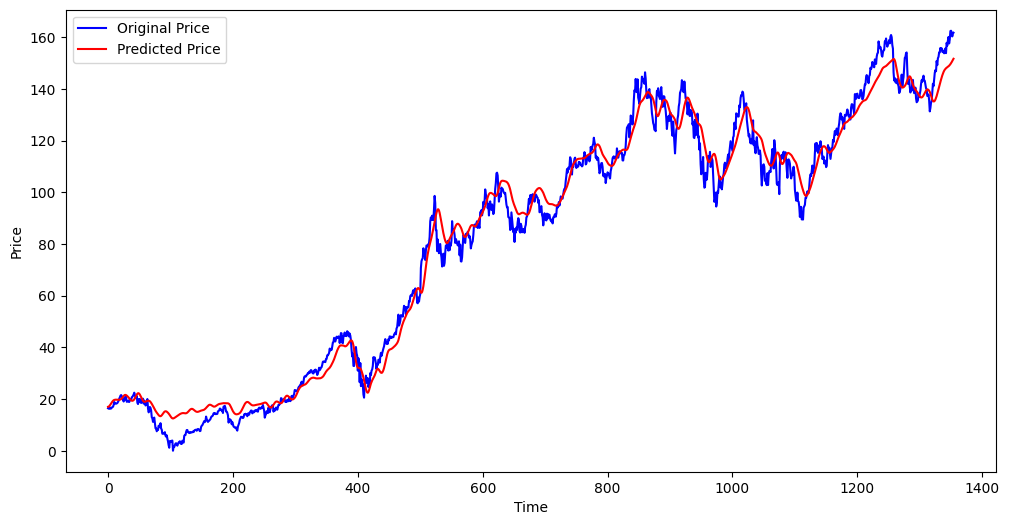

In [75]:
plt.figure(figsize=(12, 6))
plt.plot(y_test, 'b', label = 'Original Price')
plt.plot(y_predicted, 'r', label = 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()